# 0. Quiz

> 보스턴 주택 가격 데이터 LDA를 이용하여 차원축소하고 KNN을 이용하여 정확도를 구하시오(다음 순서를 참고하여 작성하시오)
1. 데이터 얻기
2. 학습 및 테스트 데이터 나누기
3. 데이터 표준화
4. 주성분데이터 찾기
5. KNN 모델 적용

# 1. 데이터 얻기

In [1]:
from sklearn import datasets

X, y = datasets.fetch_openml('boston', version=1, return_X_y=True)

# 2. 학습 및 테스트 데이터 나누기

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 3. 데이터 표준화

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# 4. 주성분 데이터 찾기

In [4]:
y_train[:3]

502    20.6
172    23.1
80     28.0
Name: MEDV, dtype: float64

In [5]:
y_train = y_train.astype('int')
y_train[:3]

502    20
172    23
80     28
Name: MEDV, dtype: int32

> lda는 독립변수와 종속변수 두 가지를 인자로 받아 학습하게 되는데 종속변수는 정수형이어야 함으로 위와 같이 형변환을 진행했다.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)
lda.explained_variance_ratio_

array([0.64547373, 0.1347295 , 0.0604925 , 0.03457479, 0.02916634,
       0.02291498, 0.01947991, 0.01413407, 0.01166236, 0.00883496,
       0.00721937, 0.00629072, 0.00502678])

In [8]:
import numpy as np 

x_length = len(X_train.loc[0])
x = np.arange(x_length)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

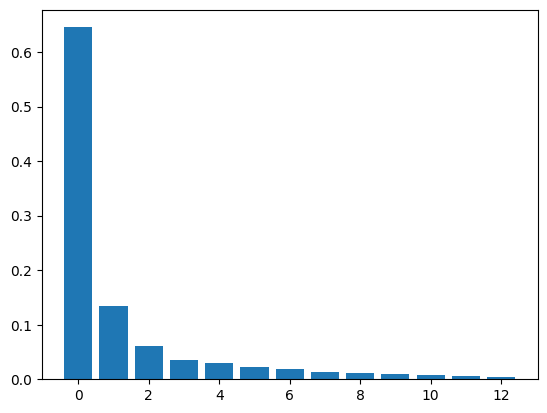

In [9]:
import matplotlib.pyplot as plt 

plt.bar(x, lda.explained_variance_ratio_)
plt.show()

> 실행 결과 첫 번째 feature가 가장 높은 분산량을 갖게 되며 가장 마지막 데이터는 굉장히 미미한 분산량을 갖게 되는 것을 볼 수 있다. 따라서 적당한 feature 개수는 3~5개 정도로 보인다.

# 5. K 최근접 이웃 모델 적용

In [10]:
n_component_size = 5
lda = LinearDiscriminantAnalysis(n_components=n_component_size)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=n_component_size)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 정확도 : ', round(train_score, 3))
print('검증 정확도 : ', round(test_score, 3))

학습 정확도 :  0.856
검증 정확도 :  0.818


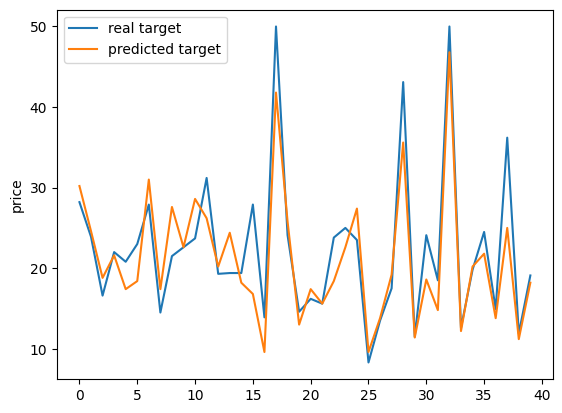

In [13]:
number_of_sample = 40

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('price')
plt.legend()
plt.show()